## Unsupervised learning example

In this example we will use the `iris dataset` ([link to the dataset card](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)).

This dataset is already included in the sklearn library, so we do not need to do any preprocessing.

We train a classifier in an unsupervised fashion using the K-means clustering model.

Import the data

In [2]:
from sklearn import datasets
 
# Import the dataset
iris = datasets.load_iris()

In [3]:
# What are the data feature names?

iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Let us have a look at the shape of the dataset.

In [ ]:
n_data_points = len(iris['data'])
n_features = len(iris['feature_names'])
feature_names = iris['feature_names']
targets = iris['target_names']
print(f'The dataset has {n_data_points} datapoints')
print(f'The data has {n_features} features, they are {feature_names}')
print(f'The data can have targets {targets}')

The dataset has 150 datapoints
The data has 4 features, they are ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The data can have targets ['setosa' 'versicolor' 'virginica']


Consider only two features (sepal length and sepal width), so that we can plot the datapoints in the plane.

In [ ]:
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

In [ ]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define a pileline that scales and fits the model
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KMeans(n_clusters=3))]
)

Let us again divide into training and testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

Let us fit the KMeans model and calculate the accuracy.

In [ ]:
clf.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KMeans(n_clusters=3))])

Note that this is not a supervised method, so calculating accuracy makes less sense than when we looked at the SVM. Instead, we plot the areas that are divided into clusters by the KMeans model and compare it to our labels.

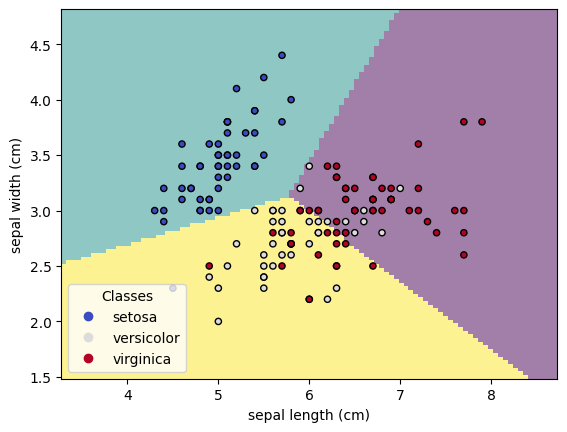

In [ ]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]


clf.fit(X_train)
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_test,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    shading="auto",
    alpha=0.5,
    ax=ax,
)
scatter = ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
disp.ax_.legend(
    scatter.legend_elements()[0],
    iris.target_names,
    loc="lower left",
    title="Classes",
)

plt.show()